<a href="https://colab.research.google.com/github/LuigiVanzella/Estrutura-de-Dados/blob/main/Lista_Duplamente_Encadeada_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista **Duplamente Encadeada** em C (Colab)

Notebook didático com **implementação completa** de Lista Duplamente Encadeada (LDL) em C, incluindo:
- `dllist.h`: estruturas e protótipos.
- `dllist.c`: funções de criação, inserção, remoção, busca, impressão, *reverse*, *concat* e inserção ordenada.
- `main.c`: testes e demonstrações passo-a-passo (com **endereços de memória**).
- Células para **compilar e executar**.

**Sugestão de estudo**: execute cada célula na ordem e observe a evolução dos ponteiros (`prev`, `next`, `begin`, `end`).

## Sumário
1. Introdução e Estruturas
2. Arquivo de Cabeçalho: `dllist.h`
3. Implementação: `dllist.c`
   - Criação / Destruição / Predicados
   - Inserções (`add_first`, `add_last` via `end`, `add_last_traverse`, `add_at`)
   - Remoções (`remove_first`, `remove_last`, `remove_at`)
   - Busca e Índice (`search`, `index_of`)
   - Impressão (`print`, `print_reverse`, `debug`)
   - Operações extras (`reverse`, `concat`, `insert_sorted`)
4. Programa de Teste: `main.c`
5. Compilar & Executar
6. Visualização de operações (Python)
7. Exercícios & Extensões

## 1) Introdução a Estrutura
A **Lista Duplamente Encadeada (LDL)** mantém, em cada nó, ponteiros para o anterior (`prev`) e para o próximo (`next`).
No **TAD** abaixo, a lista guarda ponteiros para o **início** (`begin`) e para o **fim** (`end`), permitindo inserções/remoções O(1) nas extremidades.
Mantemos também `size` para consultas O(1) do tamanho.

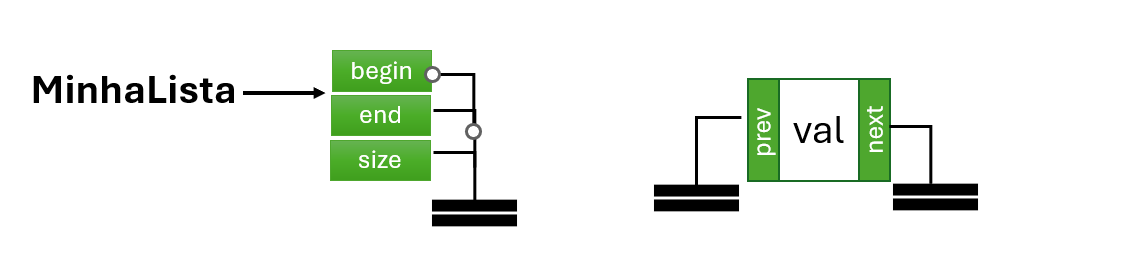

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Assinaturas das funções públicas */
DLinkedList* DLinkedList_create(void);
void DLinkedList_add_first(DLinkedList *L, int val);
void DLinkedList_debug(const DLinkedList *L);

#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Estruturas
 * ==================== */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* ====================
 * Auxiliares
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação / Destruição / Predicados
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

Overwriting dllist.c


In [ ]:
!gcc -c dllist.c -o dllist.o


## 2) Criar nó Lista Vazia

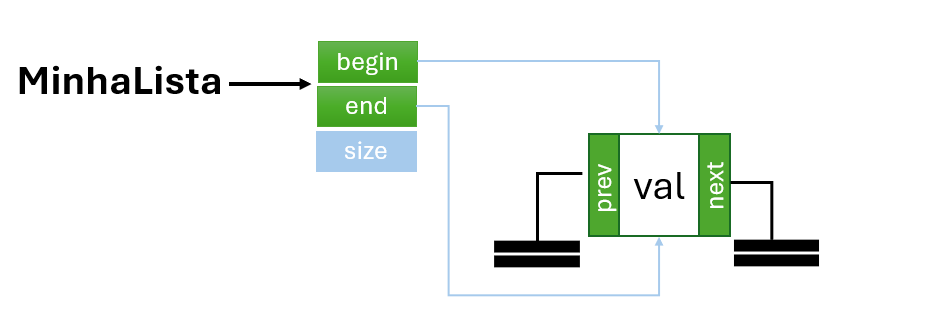

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);

#endif



Writing dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}



Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);
    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog


================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffe566eeb60
MinhaLista  (valor, endereco da struct)= 0x5c024a8ab6b0
L (valor do ponteiro)        = 0x5c024a8ab6b0
&L->begin (endereço campo)    = 0x5c024a8ab6b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5c024a8ab6b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5c024a8ab6c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffe566eeb60
MinhaLista  (valor, endereco da struct)= 0x5c024a8ab6b0
L (valor do ponteiro)        = 0x5c024a8ab6b0
&L->begin (endereço campo)    = 0x5c024a8ab6b0 | L->begin (valor) = 0x5c024a8ab6d0
&L->end   (endereço campo)    = 0x5c024a8ab6b8 | L->end   (valor) = 0x5c024a8ab6d0
&L->size  (endereço campo)    = 0x5c024a8ab6c0 | L->size          = 1
No[0]  @0x5c024a8ab6d0 | val=10 | &val=0x5c024a8ab6d0 | prev=(nil) | &prev=0x5c024a8ab6d8 | next=(nil) | &next=0x5c024a8ab6e0


## 3) Adicionar no Inicio da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);

#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}



Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(20)");
    DLinkedList_add_first(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7fff86c6af20
MinhaLista  (valor, endereco da struct)= 0x5826cde606b0
L (valor do ponteiro)        = 0x5826cde606b0
&L->begin (endereço campo)    = 0x5826cde606b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5826cde606b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5826cde606c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7fff86c6af20
MinhaLista  (valor, endereco da struct)= 0x5826cde606b0
L (valor do ponteiro)        = 0x5826cde606b0
&L->begin (endereço campo)    = 0x5826cde606b0 | L->begin (valor) = 0x5826cde606d0
&L->end   (endereço campo)    = 0x5826cde606b8 | L->end   (valor) = 0x5826cde606d0
&L->size  (endereço campo)    = 0x5826cde606c0 | L->size          = 1
No[0]  @0x5826cde606d0 | val=10 | &val=0x5826cde606d0 | prev=(nil) | &prev=0x5826cde606d8 | next=(nil) | &next=0x5826cde606e0

=

## 4) Adicionar no Final da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);
void         DLinkedList_add_last(DLinkedList *L, int val);

#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

void DLinkedList_add_last(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        n->prev = L->end;
        L->end->next = n;
        L->end = n;
    }
    L->size++;
}


/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}



Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_LAST(20)");
    DLinkedList_add_last(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffd06f4fb50
MinhaLista  (valor, endereco da struct)= 0x5ccfbea246b0
L (valor do ponteiro)        = 0x5ccfbea246b0
&L->begin (endereço campo)    = 0x5ccfbea246b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5ccfbea246b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5ccfbea246c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffd06f4fb50
MinhaLista  (valor, endereco da struct)= 0x5ccfbea246b0
L (valor do ponteiro)        = 0x5ccfbea246b0
&L->begin (endereço campo)    = 0x5ccfbea246b0 | L->begin (valor) = 0x5ccfbea246d0
&L->end   (endereço campo)    = 0x5ccfbea246b8 | L->end   (valor) = 0x5ccfbea246d0
&L->size  (endereço campo)    = 0x5ccfbea246c0 | L->size          = 1
No[0]  @0x5ccfbea246d0 | val=10 | &val=0x5ccfbea246d0 | prev=(nil) | &prev=0x5ccfbea246d8 | next=(nil) | &next=0x5ccfbea246e0

=

## 5) Adicionar na posição [i] da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);
void         DLinkedList_add_last(DLinkedList *L, int val);
bool         DLinkedList_add_at(DLinkedList *L, int val, size_t index);
void         DLinkedList_print(const DLinkedList *L);


#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

void DLinkedList_add_last(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        n->prev = L->end;
        L->end->next = n;
        L->end = n;
    }
    L->size++;
}

bool DLinkedList_add_at(DLinkedList *L, int val, size_t index){
    if(index > L->size) return false;
    if(index == 0){ DLinkedList_add_first(L, val); return true; }
    if(index == L->size){ DLinkedList_add_last(L, val); return true; }

    /* Escolha de direção: se mais perto do fim, começa do end */
    DNode *cur;
    size_t i;
    if(index <= L->size/2){
        cur = L->begin; i = 0;
        while(i < index){ cur = cur->next; i++; }
    }else{
        cur = L->end; i = L->size - 1;
        while(i > index){ cur = cur->prev; i--; }
    }
    /* Inserir ANTES de cur */
    DNode *n = DNode_create(val);
    n->prev = cur->prev;
    n->next = cur;
    cur->prev->next = n;
    cur->prev = n;
    L->size++;
    return true;
}
/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}

void DLinkedList_print(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->begin; p != NULL; p = p->next){
        printf("%d", p->val);
        if(p->next) printf(" <-> ");
    }
    printf("] (size=%zu)\n", L->size);
}


Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_LAST(20)");
    DLinkedList_add_last(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_AT(index=1, val=99)");
    DLinkedList_add_at(MinhaLista,99,1);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffe95cee2e0
MinhaLista  (valor, endereco da struct)= 0x5cab802ca6b0
L (valor do ponteiro)        = 0x5cab802ca6b0
&L->begin (endereço campo)    = 0x5cab802ca6b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5cab802ca6b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5cab802ca6c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffe95cee2e0
MinhaLista  (valor, endereco da struct)= 0x5cab802ca6b0
[10] (size=1)
L (valor do ponteiro)        = 0x5cab802ca6b0
&L->begin (endereço campo)    = 0x5cab802ca6b0 | L->begin (valor) = 0x5cab802ca6d0
&L->end   (endereço campo)    = 0x5cab802ca6b8 | L->end   (valor) = 0x5cab802ca6d0
&L->size  (endereço campo)    = 0x5cab802ca6c0 | L->size          = 1
No[0]  @0x5cab802ca6d0 | val=10 | &val=0x5cab802ca6d0 | prev=(nil) | &prev=0x5cab802ca6d8 | next=(nil) | &next=0x5

## 6) Remover no Inicio da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);
bool         DLinkedList_remove_first(DLinkedList *L, int *out);
void DLinkedList_print(const DLinkedList *L);

#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}
/* ====================
 * Remoções
 * ==================== */

bool DLinkedList_remove_first(DLinkedList *L, int *out){
    if(!L || !L->begin) return false;

    DNode *n = L->begin;
    if(out) *out = n->val;

    L->begin = n->next;          /* avança cabeça */
    if(L->begin){
        L->begin->prev = NULL;   /* nova cabeça não tem anterior */
    }else{
        L->end = NULL;           /* lista ficou vazia */
    }

    free(n);
    L->size--;
    return true;
}


/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}

void DLinkedList_print(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->begin; p != NULL; p = p->next){
        printf("%d", p->val);
        if(p->next) printf(" <-> ");
    }
    printf("] (size=%zu)\n", L->size);
}


Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(20)");
    DLinkedList_add_first(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("REMOVE_FIRST");
    int x;
    DLinkedList_remove_first(MinhaLista, &x);
    printf("remove_first -> %d\n", x);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);


    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffdad2a5af0
MinhaLista  (valor, endereco da struct)= 0x5d4e0bb3f6b0
L (valor do ponteiro)        = 0x5d4e0bb3f6b0
&L->begin (endereço campo)    = 0x5d4e0bb3f6b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5d4e0bb3f6b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5d4e0bb3f6c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffdad2a5af0
MinhaLista  (valor, endereco da struct)= 0x5d4e0bb3f6b0
L (valor do ponteiro)        = 0x5d4e0bb3f6b0
&L->begin (endereço campo)    = 0x5d4e0bb3f6b0 | L->begin (valor) = 0x5d4e0bb3f6d0
&L->end   (endereço campo)    = 0x5d4e0bb3f6b8 | L->end   (valor) = 0x5d4e0bb3f6d0
&L->size  (endereço campo)    = 0x5d4e0bb3f6c0 | L->size          = 1
No[0]  @0x5d4e0bb3f6d0 | val=10 | &val=0x5d4e0bb3f6d0 | prev=(nil) | &prev=0x5d4e0bb3f6d8 | next=(nil) | &next=0x5d4e0bb3f6e0

=

## 7) Remover no Final da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas (definidas apenas aqui) */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* Funções públicas */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_add_first(DLinkedList *L, int val);
void         DLinkedList_debug(const DLinkedList *L);
void         DLinkedList_add_last(DLinkedList *L, int val);
bool  DLinkedList_remove_first(DLinkedList *L, int *out);
bool  DLinkedList_remove_last (DLinkedList *L, int *out);

void DLinkedList_print(const DLinkedList *L);

#endif



Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

void DLinkedList_add_last(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        n->prev = L->end;
        L->end->next = n;
        L->end = n;
    }
    L->size++;
}

/* ====================
 * Remover
 * ==================== */


bool DLinkedList_remove_first(DLinkedList *L, int *out){
    if(!L || !L->begin) return false;

    DNode *n = L->begin;
    if(out) *out = n->val;

    L->begin = n->next;          /* avança cabeça */
    if(L->begin){
        L->begin->prev = NULL;   /* nova cabeça não tem anterior */
    }else{
        L->end = NULL;           /* lista ficou vazia */
    }

    free(n);
    L->size--;
    return true;
}

bool DLinkedList_remove_last(DLinkedList *L, int *out){
    if(!L || !L->end) return false;

    DNode *n = L->end;
    if(out) *out = n->val;

    L->end = n->prev;            /* recua cauda */
    if(L->end){
        L->end->next = NULL;     /* nova cauda não tem próximo */
    }else{
        L->begin = NULL;         /* lista ficou vazia */
    }

    free(n);
    L->size--;
    return true;
}

/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}

void DLinkedList_print(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->begin; p != NULL; p = p->next){
        printf("%d", p->val);
        if(p->next) printf(" <-> ");
    }
    printf("] (size=%zu)\n", L->size);
}

Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_LAST(20)");
    DLinkedList_add_last(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("REMOVE_LAST");
    int x;
    DLinkedList_remove_last(MinhaLista, &x);
    printf("remove_last -> %d\n", x);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffd17e8db40
MinhaLista  (valor, endereco da struct)= 0x5b41c95ea6b0
L (valor do ponteiro)        = 0x5b41c95ea6b0
&L->begin (endereço campo)    = 0x5b41c95ea6b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x5b41c95ea6b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x5b41c95ea6c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7ffd17e8db40
MinhaLista  (valor, endereco da struct)= 0x5b41c95ea6b0
L (valor do ponteiro)        = 0x5b41c95ea6b0
&L->begin (endereço campo)    = 0x5b41c95ea6b0 | L->begin (valor) = 0x5b41c95ea6d0
&L->end   (endereço campo)    = 0x5b41c95ea6b8 | L->end   (valor) = 0x5b41c95ea6d0
&L->size  (endereço campo)    = 0x5b41c95ea6c0 | L->size          = 1
No[0]  @0x5b41c95ea6d0 | val=10 | &val=0x5b41c95ea6d0 | prev=(nil) | &prev=0x5b41c95ea6d8 | next=(nil) | &next=0x5b41c95ea6e0

=

## 8) Remover na posição [i] da Lista

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* Estruturas expostas */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* API pública */
DLinkedList* DLinkedList_create(void);

/* Inserções */
void  DLinkedList_add_first(DLinkedList *L, int val);
void  DLinkedList_add_last (DLinkedList *L, int val);
bool  DLinkedList_add_at   (DLinkedList *L, int val, size_t index);  /* <-- NOVO */

/* Remoções */
bool  DLinkedList_remove_first(DLinkedList *L, int *out);
bool  DLinkedList_remove_last (DLinkedList *L, int *out);
bool  DLinkedList_remove_at   (DLinkedList *L, size_t index, int *out); /* <-- (já usa no .c) */

/* Utilitários */
void  DLinkedList_print(const DLinkedList *L);
void  DLinkedList_debug(const DLinkedList *L);

#endif


Overwriting dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliar
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val  = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

void DLinkedList_add_last(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        n->prev = L->end;
        L->end->next = n;
        L->end = n;
    }
    L->size++;
}

/* Inserir em índice (0-based). Insere ANTES de index. */
bool DLinkedList_add_at(DLinkedList *L, int val, size_t index){
    if(!L || index > L->size) return false;

    if(index == 0){                 /* antes do primeiro */
        DLinkedList_add_first(L, val);
        return true;
    }
    if(index == L->size){           /* no fim (após o último) */
        DLinkedList_add_last(L, val);
        return true;
    }

    /* Caminho mais curto até o nó atualmente em 'index' */
    DNode *cur;
    if(index <= L->size/2){
        cur = L->begin;
        for(size_t i = 0; i < index; ++i) cur = cur->next;
    }else{
        cur = L->end;
        for(size_t i = L->size - 1; i > index; --i) cur = cur->prev;
    }

    /* Inserir antes de 'cur' */
    DNode *n = DNode_create(val);
    n->prev = cur->prev;
    n->next = cur;
    cur->prev->next = n;
    cur->prev = n;

    L->size++;
    return true;
}


/* ====================
 * Remover
 * ==================== */


bool DLinkedList_remove_first(DLinkedList *L, int *out){
    if(!L || !L->begin) return false;

    DNode *n = L->begin;
    if(out) *out = n->val;

    L->begin = n->next;          /* avança cabeça */
    if(L->begin){
        L->begin->prev = NULL;   /* nova cabeça não tem anterior */
    }else{
        L->end = NULL;           /* lista ficou vazia */
    }

    free(n);
    L->size--;
    return true;
}

bool DLinkedList_remove_last(DLinkedList *L, int *out){
    if(!L || !L->end) return false;

    DNode *n = L->end;
    if(out) *out = n->val;

    L->end = n->prev;            /* recua cauda */
    if(L->end){
        L->end->next = NULL;     /* nova cauda não tem próximo */
    }else{
        L->begin = NULL;         /* lista ficou vazia */
    }

    free(n);
    L->size--;
    return true;
}

bool DLinkedList_remove_at(DLinkedList *L, size_t index, int *out){
    if(!L || index >= L->size) return false;

    /* bordas delegam para first/last */
    if(index == 0)              return DLinkedList_remove_first(L, out);
    if(index == L->size - 1)    return DLinkedList_remove_last(L,  out);

    /* localizar o nó a remover pelo caminho mais curto */
    DNode *cur;
    if(index <= L->size/2){
        cur = L->begin;
        for(size_t i = 0; i < index; ++i) cur = cur->next;
    }else{
        cur = L->end;
        for(size_t i = L->size - 1; i > index; --i) cur = cur->prev;
    }

    if(out) *out = cur->val;

    /* “desencaixa” o nó do meio */
    DNode *a = cur->prev;
    DNode *b = cur->next;
    a->next = b;
    b->prev = a;

    free(cur);
    L->size--;
    return true;
}

/* ====================
 * Debug
 * ==================== */
/* Debug detalhado: valores e endereços */
void DLinkedList_debug(const DLinkedList *L){
    printf("L (valor do ponteiro)        = %p\n", (void*)L);
    if(!L){
        printf("(Lista NULL)\n");
        return;
    }
    printf("&L->begin (endereço campo)    = %p | L->begin (valor) = %p\n",
           (void*)&L->begin, (void*)L->begin);
    printf("&L->end   (endereço campo)    = %p | L->end   (valor) = %p\n",
           (void*)&L->end,   (void*)L->end);
    printf("&L->size  (endereço campo)    = %p | L->size          = %zu\n",
           (void*)&L->size,  L->size);

    size_t i = 0;
    for(const DNode *p = L->begin; p != NULL; p = p->next, ++i){
        printf("No[%zu]  @%p | val=%d | &val=%p | "
               "prev=%p | &prev=%p | next=%p | &next=%p\n",
               i,
               (void*)p, p->val, (void*)&p->val,
               (void*)p->prev, (void*)&p->prev,
               (void*)p->next, (void*)&p->next);
    }
}

void DLinkedList_print(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->begin; p != NULL; p = p->next){
        printf("%d", p->val);
        if(p->next) printf(" <-> ");
    }
    printf("] (size=%zu)\n", L->size);
}

Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *MinhaLista = DLinkedList_create();

    /* Endereço da VAR ponteiro (na stack) e valor do ponteiro */
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_FIRST(10)");
    DLinkedList_add_first(MinhaLista, 10);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_LAST(20)");
    DLinkedList_add_last(MinhaLista, 20);
    printf("&MinhaLista (endereco da VAR ponteiro) = %p\n", (void*)&MinhaLista);
    printf("MinhaLista  (valor, endereco da struct)= %p\n", (void*)MinhaLista);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    titulo("ADD_AT(index=1, val=99)");
    DLinkedList_add_at(MinhaLista,99,1);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);


    titulo("REMOVE_AT(2)");
    int x;
    DLinkedList_remove_at(MinhaLista, 2, &x);
    printf("remove_at(2) -> %d\n", x);
    DLinkedList_print(MinhaLista);
    DLinkedList_debug(MinhaLista);

    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
&MinhaLista (endereco da VAR ponteiro) = 0x7fffecb21ef0
MinhaLista  (valor, endereco da struct)= 0x592b51cdc6b0
L (valor do ponteiro)        = 0x592b51cdc6b0
&L->begin (endereço campo)    = 0x592b51cdc6b0 | L->begin (valor) = (nil)
&L->end   (endereço campo)    = 0x592b51cdc6b8 | L->end   (valor) = (nil)
&L->size  (endereço campo)    = 0x592b51cdc6c0 | L->size          = 0

================ ADD_FIRST(10) ================
&MinhaLista (endereco da VAR ponteiro) = 0x7fffecb21ef0
MinhaLista  (valor, endereco da struct)= 0x592b51cdc6b0
[10] (size=1)
L (valor do ponteiro)        = 0x592b51cdc6b0
&L->begin (endereço campo)    = 0x592b51cdc6b0 | L->begin (valor) = 0x592b51cdc6d0
&L->end   (endereço campo)    = 0x592b51cdc6b8 | L->end   (valor) = 0x592b51cdc6d0
&L->size  (endereço campo)    = 0x592b51cdc6c0 | L->size          = 1
No[0]  @0x592b51cdc6d0 | val=10 | &val=0x592b51cdc6d0 | prev=(nil) | &prev=0x592b51cdc6d8 | next=(nil) | &next=0x5

## 8) Implementação completa

In [ ]:
%%writefile dllist.h
#ifndef DLLIST_H
#define DLLIST_H

#include <stdbool.h>
#include <stddef.h>

/* ====================
 * Estruturas
 * ==================== */
typedef struct _dnode {
    int val;
    struct _dnode *prev;
    struct _dnode *next;
} DNode;

typedef struct _dlinked_list {
    DNode *begin;   /* cabeça */
    DNode *end;     /* cauda  */
    size_t size;    /* número de nós */
} DLinkedList;

/* ====================
 * Criação / Destruição / Predicados
 * ==================== */
DLinkedList* DLinkedList_create(void);
void         DLinkedList_destroy(DLinkedList *L);
bool         DLinkedList_is_empty(const DLinkedList *L);
size_t       DLinkedList_size(const DLinkedList *L);

/* ====================
 * Inserções
 * ==================== */
void  DLinkedList_add_first(DLinkedList *L, int val);
/* add_last O(n) percorrendo a partir do begin (didático) */
void  DLinkedList_add_last_traverse(DLinkedList *L, int val);
/* add_last O(1) usando ponteiro end */
void  DLinkedList_add_last(DLinkedList *L, int val);
bool  DLinkedList_add_at(DLinkedList *L, int val, size_t index);

/* ====================
 * Remoções
 * ==================== */
bool  DLinkedList_remove_first(DLinkedList *L, int *out);
bool  DLinkedList_remove_last (DLinkedList *L, int *out);
bool  DLinkedList_remove_at   (DLinkedList *L, size_t index, int *out);

/* ====================
 * Busca / Índice
 * ==================== */
DNode* DLinkedList_search(const DLinkedList *L, int val);
long   DLinkedList_index_of(const DLinkedList *L, int val);

/* ====================
 * Impressão / Debug
 * ==================== */
void   DLinkedList_print         (const DLinkedList *L);
void   DLinkedList_print_reverse (const DLinkedList *L);
void   DLinkedList_debug         (const DLinkedList *L);

/* ====================
 * Operações extras
 * ==================== */
void   DLinkedList_reverse(DLinkedList *L);           /* in-place */
void   DLinkedList_concat (DLinkedList *A, DLinkedList *B); /* move B ao fim de A (B esvaziada) */
void   DLinkedList_insert_sorted(DLinkedList *L, int val);  /* ordem crescente */

#endif /* DLLIST_H */

Writing dllist.h


In [ ]:
%%writefile dllist.c
#include "dllist.h"
#include <stdio.h>
#include <stdlib.h>

/* ====================
 * Auxiliares
 * ==================== */
static DNode* DNode_create(int val){
    DNode *n = (DNode*) calloc(1, sizeof(DNode));
    if(!n){
        fprintf(stderr, "Erro: sem memória para DNode\n");
        exit(EXIT_FAILURE);
    }
    n->val = val;
    n->prev = NULL;
    n->next = NULL;
    return n;
}

/* ====================
 * Criação / Destruição / Predicados
 * ==================== */
DLinkedList* DLinkedList_create(void){
    DLinkedList *L = (DLinkedList*) calloc(1, sizeof(DLinkedList));
    if(!L){
        fprintf(stderr, "Erro: sem memória para DLinkedList\n");
        exit(EXIT_FAILURE);
    }
    L->begin = NULL;
    L->end   = NULL;
    L->size  = 0;
    return L;
}

void DLinkedList_destroy(DLinkedList *L){
    if(!L) return;
    DNode *p = L->begin;
    while(p){
        DNode *aux = p->next;
        free(p);
        p = aux;
    }
    free(L);
}

bool DLinkedList_is_empty(const DLinkedList *L){
    return !L || L->size == 0;
}

size_t DLinkedList_size(const DLinkedList *L){
    return L ? L->size : 0;
}

/* ====================
 * Inserções
 * ==================== */
void DLinkedList_add_first(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->begin == NULL){
        /* lista vazia */
        L->begin = L->end = n;
    }else{
        n->next = L->begin;
        L->begin->prev = n;
        L->begin = n;
    }
    L->size++;
}

/* Didático: O(n) percorrendo a partir do begin */
void DLinkedList_add_last_traverse(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        DNode *p = L->begin;
        while(p->next) p = p->next;
        /* p == último */
        p->next = n;
        n->prev = p;
        L->end = n; /* manter coerência */
    }
    L->size++;
}

/* O(1) usando ponteiro end */
void DLinkedList_add_last(DLinkedList *L, int val){
    DNode *n = DNode_create(val);
    if(L->end == NULL){
        L->begin = L->end = n;
    }else{
        n->prev = L->end;
        L->end->next = n;
        L->end = n;
    }
    L->size++;
}

/* Insere em índice [0..size]. Retorna false se index > size */
bool DLinkedList_add_at(DLinkedList *L, int val, size_t index){
    if(index > L->size) return false;
    if(index == 0){ DLinkedList_add_first(L, val); return true; }
    if(index == L->size){ DLinkedList_add_last(L, val); return true; }

    /* Escolha de direção: se mais perto do fim, começa do end */
    DNode *cur;
    size_t i;
    if(index <= L->size/2){
        cur = L->begin; i = 0;
        while(i < index){ cur = cur->next; i++; }
    }else{
        cur = L->end; i = L->size - 1;
        while(i > index){ cur = cur->prev; i--; }
    }
    /* Inserir ANTES de cur */
    DNode *n = DNode_create(val);
    n->prev = cur->prev;
    n->next = cur;
    cur->prev->next = n;
    cur->prev = n;
    L->size++;
    return true;
}

/* ====================
 * Remoções
 * ==================== */
static bool _pop_node(DLinkedList *L, DNode *node, int *out){
    if(!node) return false;
    if(out) *out = node->val;

    if(node->prev) node->prev->next = node->next;
    else           L->begin = node->next; /* removendo cabeça */

    if(node->next) node->next->prev = node->prev;
    else           L->end = node->prev;   /* removendo cauda */

    free(node);
    L->size--;
    return true;
}

bool DLinkedList_remove_first(DLinkedList *L, int *out){
    if(L->begin == NULL) return false;
    return _pop_node(L, L->begin, out);
}

bool DLinkedList_remove_last(DLinkedList *L, int *out){
    if(L->end == NULL) return false;
    return _pop_node(L, L->end, out);
}

bool DLinkedList_remove_at(DLinkedList *L, size_t index, int *out){
    if(index >= L->size) return false;
    if(index == 0)         return DLinkedList_remove_first(L, out);
    if(index == L->size-1) return DLinkedList_remove_last(L, out);

    DNode *cur;
    size_t i;
    if(index <= L->size/2){
        cur = L->begin; i = 0;
        while(i < index){ cur = cur->next; i++; }
    }else{
        cur = L->end; i = L->size - 1;
        while(i > index){ cur = cur->prev; i--; }
    }
    return _pop_node(L, cur, out);
}

/* ====================
 * Busca / Índice
 * ==================== */
DNode* DLinkedList_search(const DLinkedList *L, int val){
    for(DNode *p = L->begin; p != NULL; p = p->next){
        if(p->val == val) return p;
    }
    return NULL;
}

long DLinkedList_index_of(const DLinkedList *L, int val){
    long i = 0;
    for(DNode *p = L->begin; p != NULL; p = p->next, i++){
        if(p->val == val) return i;
    }
    return -1;
}

/* ====================
 * Impressão / Debug
 * ==================== */
void DLinkedList_print(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->begin; p != NULL; p = p->next){
        printf("%d", p->val);
        if(p->next) printf(" <-> ");
    }
    printf("] (size=%zu)\n", L->size);
}

void DLinkedList_print_reverse(const DLinkedList *L){
    printf("[");
    for(DNode *p = L->end; p != NULL; p = p->prev){
        printf("%d", p->val);
        if(p->prev) printf(" <-> ");
    }
    printf("] (rev)\n");
}

void DLinkedList_debug(const DLinkedList *L){
    printf("begin=%p  end=%p  size=%zu\n", (void*)L->begin, (void*)L->end, L->size);
    for(DNode *p = L->begin; p; p = p->next){
        printf("Node@%p  val=%d  prev=%p  next=%p\n",
               (void*)p, p->val, (void*)p->prev, (void*)p->next);
    }
}

/* ====================
 * Operações extras
 * ==================== */
void DLinkedList_reverse(DLinkedList *L){
    /* In-place: troca prev/next de cada nó e então swap begin/end */
    DNode *p = L->begin;
    while(p){
        DNode *aux = p->next;
        p->next = p->prev;
        p->prev = aux;
        p = aux;
    }
    /* swap begin/end */
    DNode *tmp = L->begin;
    L->begin = L->end;
    L->end = tmp;
}

void DLinkedList_concat(DLinkedList *A, DLinkedList *B){
    if(!B || B->size == 0) return;
    if(!A || A->size == 0){
        /* move ponteiros */
        A->begin = B->begin;
        A->end   = B->end;
        A->size  = B->size;
    }else{
        /* liga as caudas/cabeças */
        A->end->next = B->begin;
        B->begin->prev = A->end;
        A->end = B->end;
        A->size += B->size;
    }
    /* esvazia B sem liberar nós (transferência de posse) */
    B->begin = B->end = NULL;
    B->size = 0;
}

void DLinkedList_insert_sorted(DLinkedList *L, int val){
    if(L->size == 0 || val <= L->begin->val){ DLinkedList_add_first(L, val); return; }
    if(val >= L->end->val){ DLinkedList_add_last(L, val); return; }

    /* Caminhar até encontrar o primeiro nó com p->val >= val */
    DNode *p = L->begin->next;
    while(p && p->val < val){ p = p->next; }
    /* Inserir ANTES de p */
    DNode *n = DNode_create(val);
    n->prev = p->prev;
    n->next = p;
    p->prev->next = n;
    p->prev = n;
    L->size++;
}

Overwriting dllist.c


In [ ]:
%%writefile main.c
#include "dllist.h"
#include <stdio.h>

static void titulo(const char *s){
    printf("\n================ %s ================\n", s);
}

int main(void){
    titulo("CRIAR LISTA VAZIA");
    DLinkedList *L = DLinkedList_create();
    DLinkedList_debug(L);

    titulo("ADD_FIRST(10), ADD_FIRST(20), ADD_FIRST(30)");
    DLinkedList_add_first(L,10);
    DLinkedList_add_first(L,20);
    DLinkedList_add_first(L,30);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("ADD_LAST_TRAVERSE(40)  [didático: O(n)]");
    DLinkedList_add_last_traverse(L,40);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("ADD_LAST(50) [O(1) via end]");
    DLinkedList_add_last(L,50);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("ADD_AT(index=2, val=99)");
    DLinkedList_add_at(L,99,2);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("SEARCH e INDEX_OF");
    DNode *p = DLinkedList_search(L, 40);
    printf("search(40) -> %p\n", (void*)p);
    long idx = DLinkedList_index_of(L, 50);
    printf("index_of(50) -> %ld\n", idx);

    titulo("PRINT_REVERSE");
    DLinkedList_print_reverse(L);

    titulo("REMOVE_FIRST / REMOVE_LAST / REMOVE_AT(2)");
    int x;
    DLinkedList_remove_first(L, &x);
    printf("remove_first -> %d\n", x);
    DLinkedList_remove_last(L, &x);
    printf("remove_last -> %d\n", x);
    DLinkedList_remove_at(L, 2, &x);
    printf("remove_at(2) -> %d\n", x);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("REVERSE (in-place)");
    DLinkedList_reverse(L);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("CONCAT (move B para o fim de A)");
    DLinkedList *B = DLinkedList_create();
    DLinkedList_add_last(B, 5);
    DLinkedList_add_last(B, 6);
    DLinkedList_add_last(B, 7);
    printf("A antes: "); DLinkedList_print(L);
    printf("B antes: "); DLinkedList_print(B);
    DLinkedList_concat(L, B);
    printf("A depois: "); DLinkedList_print(L);
    printf("B depois: "); DLinkedList_print(B);
    DLinkedList_debug(L);

    titulo("INSERT_SORTED em A");
    DLinkedList_insert_sorted(L, 0);
    DLinkedList_insert_sorted(L, 100);
    DLinkedList_insert_sorted(L, 42);
    DLinkedList_print(L);
    DLinkedList_debug(L);

    titulo("DESTROY (libera nós e a struct da lista)");
    DLinkedList_destroy(L);
    DLinkedList_destroy(B);
    printf("OK (use valgrind no ambiente local para checar vazamentos)\n");
    return 0;
}

Writing main.c


In [ ]:
!gcc main.c dllist.c -o prog


In [ ]:
!./prog



================ CRIAR LISTA VAZIA ================
begin=(nil)  end=(nil)  size=0

================ ADD_FIRST(10), ADD_FIRST(20), ADD_FIRST(30) ================
[30 <-> 20 <-> 10] (size=3)
begin=0x5c81a796c710  end=0x5c81a796c6d0  size=3
Node@0x5c81a796c710  val=30  prev=(nil)  next=0x5c81a796c6f0
Node@0x5c81a796c6f0  val=20  prev=0x5c81a796c710  next=0x5c81a796c6d0
Node@0x5c81a796c6d0  val=10  prev=0x5c81a796c6f0  next=(nil)

================ ADD_LAST_TRAVERSE(40)  [didático: O(n)] ================
[30 <-> 20 <-> 10 <-> 40] (size=4)
begin=0x5c81a796c710  end=0x5c81a796c730  size=4
Node@0x5c81a796c710  val=30  prev=(nil)  next=0x5c81a796c6f0
Node@0x5c81a796c6f0  val=20  prev=0x5c81a796c710  next=0x5c81a796c6d0
Node@0x5c81a796c6d0  val=10  prev=0x5c81a796c6f0  next=0x5c81a796c730
Node@0x5c81a796c730  val=40  prev=0x5c81a796c6d0  next=(nil)

================ ADD_LAST(50) [O(1) via end] ================
[30 <-> 20 <-> 10 <-> 40 <-> 50] (size=5)
begin=0x5c81a796c710  end=0x5c81a796c750  